# Where are the most popular Airbnb locations?

In [2]:
%matplotlib inline

import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [33]:
#Read in CSV data files
airbnb = pd.read_csv('zip_clean.csv',index_col=0)
airbnb15 = pd.read_csv('airbnb15.csv',index_col=0)
airbnb16 = pd.read_csv('airbnb16.csv',index_col=0)
airbnb17 = pd.read_csv('airbnb17.csv',index_col=0)
airbnb17_count = pd.read_csv('airbnb17_count.csv',index_col=0)
airbnb17_countavg = pd.read_csv('airbnb17_countavg.csv',index_col=0)
topzip17 = pd.read_csv('topzip17.csv',index_col=0)
norm17 = pd.read_csv('norm17.csv',index_col=0)
# bydz_availcount = pd.read_csv('bydz_availcount.csv',header=None)
# bydz_availcount.columns=['date_zip','avail_count']
# bydzrt_roomcount = pd.read_csv('bydzrt_roomcount.csv',header=None)
# bydzrt_roomcount.columns=['date_zip','room_type','date','bydzrt_count']
# prr_df = pd.read_csv('prr_df.csv',index_col=0)
# mlp_df = pd.read_csv('mlp_df.csv',index_col=0)
# air_zillow = pd.read_csv('airzillow_df.csv', index_col=0)


/Users/Administrator/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Where are the most Airbnbs located in NYC?

In the below bar graphs, it becomes apparent that particular zipcodes had the most Airbnbs during the 2017 year. The top 3 zipcodes are 11211, 11221, and 11206. Respectively, these neighborhoods are Williamsburg/Greenpoint, Bed-Stuy/Bushwick, and Bushwick/Williamsburg. If you look at these areas on the map, you'll notice that these locations are all in Brooklyn and within close proximity of each other.

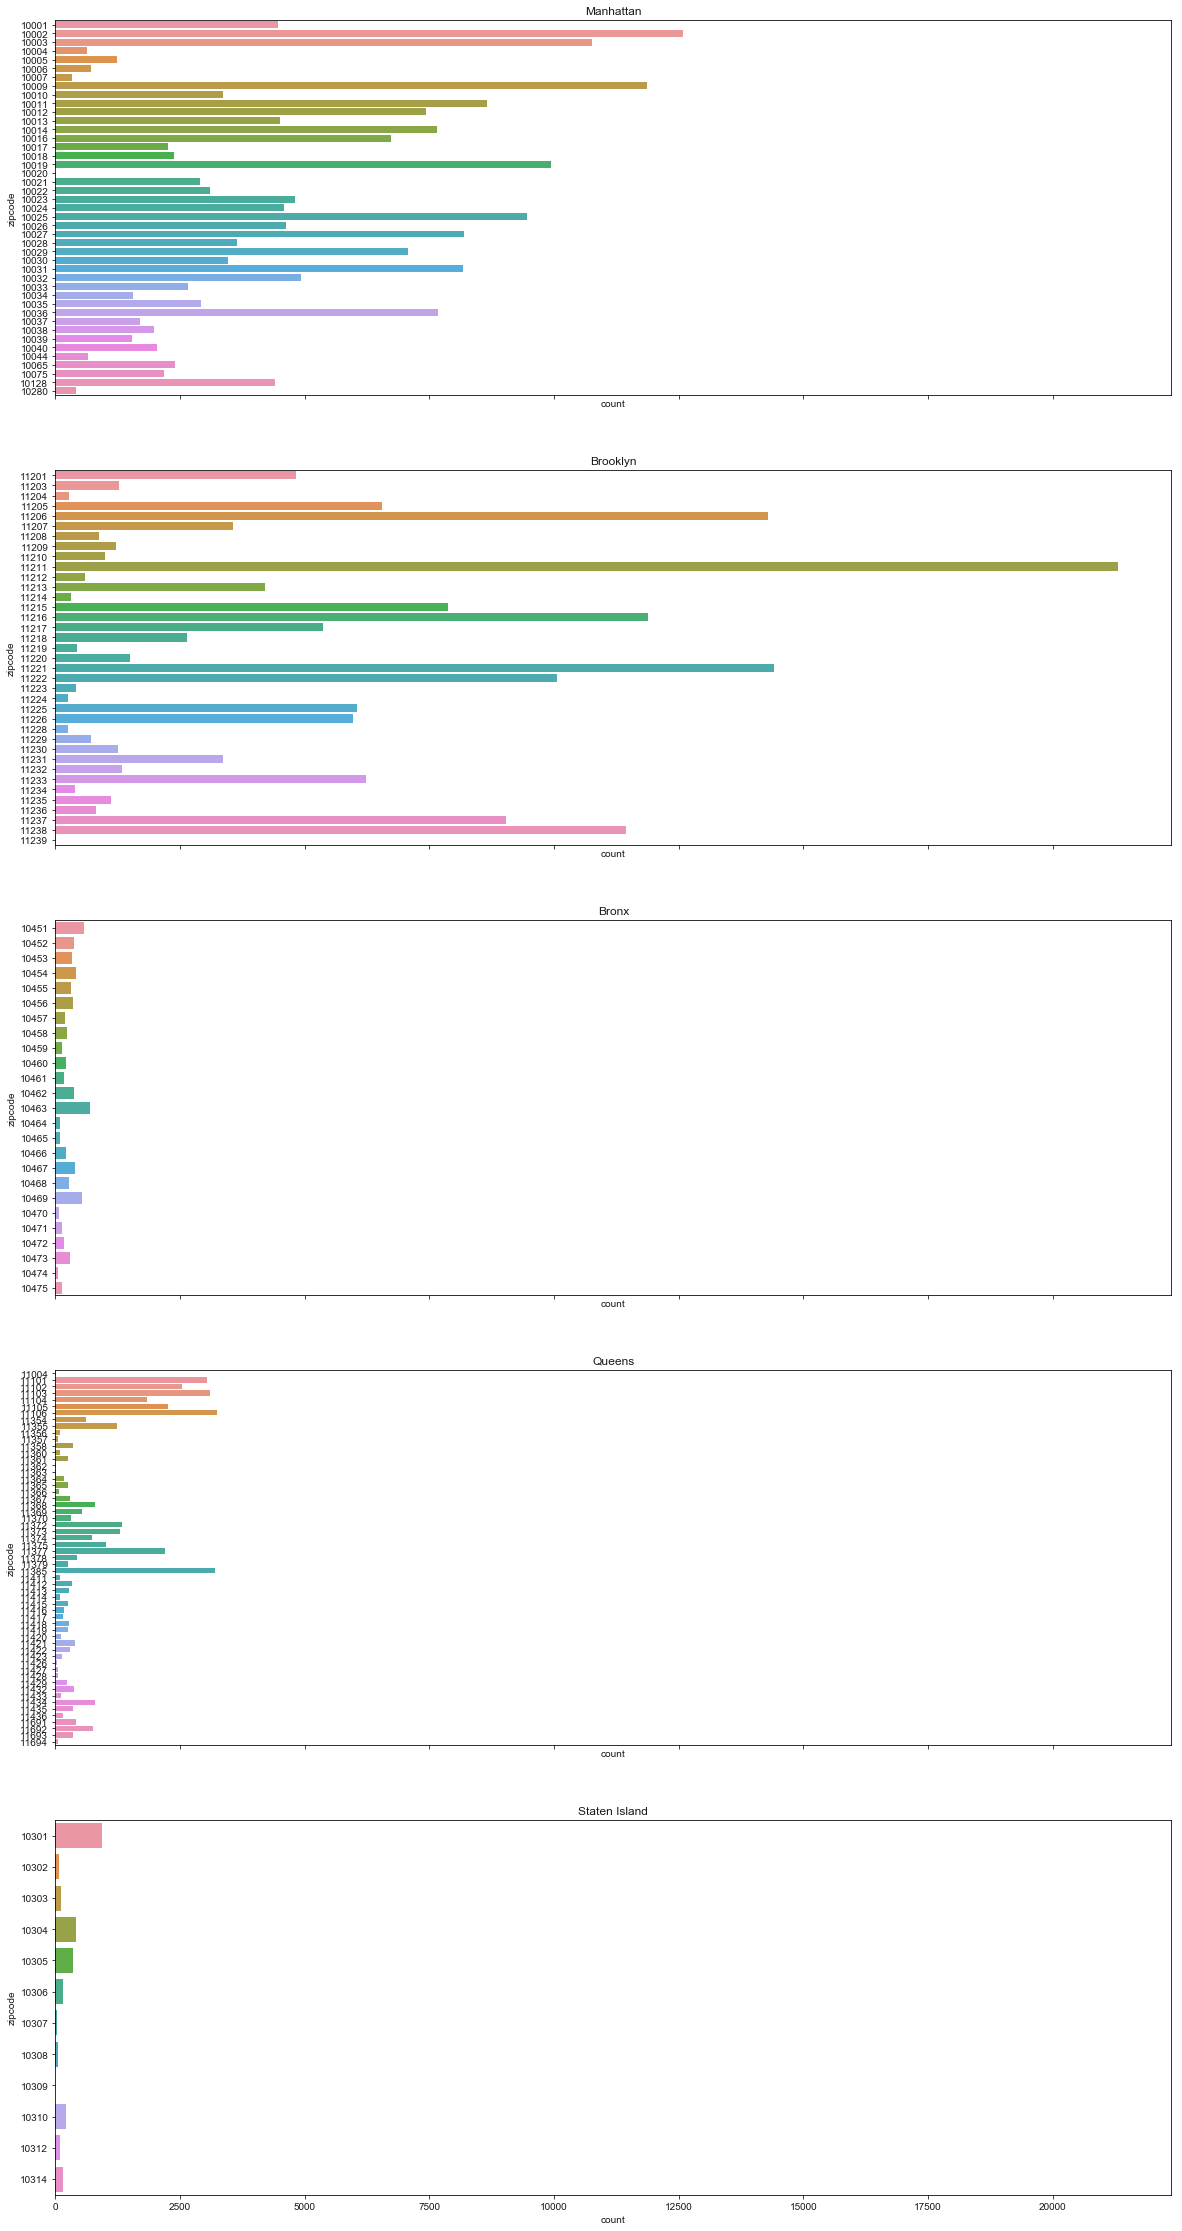

In [7]:
#NYC Airbnb's roomtypes from 2017 period
fig = plt.figure()
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(20,40),sharex=True)

sns.set(style="whitegrid", color_codes=True)

manhattan_zips = ['10026', '10027', '10030', '10037', '10039','10001', '10011', '10018', '10019', '10020', '10036', '10029', '10035', '10010', '10016', '10017', '10022', '10012', '10013', '10014', '10004', '10005', '10006', '10007', '10038', '10280', '10002', '10003', '10009', '10021', '10028', '10044', '10065', '10075', '10128', '10023', '10024', '10025', '10031', '10032', '10033', '10034', '10040']
manhattan = airbnb17[airbnb17['zipcode'].isin(manhattan_zips)]
ax1.set_title("Manhattan")
sns.countplot(y="zipcode", data=manhattan, ax=ax1)

brooklyn_zips = ['11212', '11213', '11216', '11233', '11238', '11209', '11214', '11228', '11204', '11218', '11219', '11230', '11234', '11236', '11239', '11223', '11224', '11229', '11235', '11201', '11205', '11215', '11217', '11231', '11203', '11210', '11225', '11226', '11207', '11208', '11211', '11222', '11220', '11232', '11206', '11221', '11237']
brooklyn = airbnb17[airbnb17['zipcode'].isin(brooklyn_zips)]
ax2.set_title("Brooklyn")
sns.countplot(y="zipcode", data=brooklyn, ax=ax2)

bronx_zips = ['10453', '10457', '10460', '10458', '10467', '10468', '10451', '10452', '10456', '10454', '10455', '10459', '10474', '10463', '10471', '10466', '10469', '10470', '10475', '10461', '10462','10464', '10465', '10472', '10473']
bronx = airbnb17[airbnb17['zipcode'].isin(bronx_zips)]
sns.countplot(y="zipcode", data=bronx, ax=ax3)
ax3.set_title("Bronx")

queens_zips = ['11361', '11362', '11363', '11364', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11365', '11366', '11367', '11412', '11423', '11432', '11433', '11434', '11435', '11436', '11101', '11102', '11103', '11104', '11105', '11106', '11374', '11375', '11379', '11385', '11691', '11692', '11693', '11694', '11695', '11697', '11004', '11005', '11411', '11413', '11422', '11426', '11427', '11428', '11429', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11368', '11369', '11370', '11372', '11373', '11377', '11378']
queens = airbnb17[airbnb17['zipcode'].isin(queens_zips)]
sns.countplot(y="zipcode", data=queens, ax=ax4)
ax4.set_title("Queens")

staten_zips = ['10302', '10303', '10310', '10306', '10307', '10308', '10309', '10312', '10301', '10304', '10305', '10314']
staten = airbnb17[airbnb17['zipcode'].isin(staten_zips)]
sns.countplot(y="zipcode", data=staten, ax=ax5)
ax5.set_title("Staten Island")

plt.show()

## Are these places popular due to population density in those areas? Which locations are more popular in respect to the population?

Using [2010 census data](https://www.census.gov/geo/maps-data/data/gazetteer2010.html) the data was normalized by population, and averaged for the 2017 year. Notably, the Airbnbs with regard to population tend toward Manhattan with the top 3 zipcodes being 10018, 10036, and 10012. The first two zipcodes encompass the neighborhoods of Midtown West and Clinton (near 42nd street) while the third zipcode straddles NoHo and SoHo.



*Note that zipcode 10020 was dropped in the data since it was recorded as having "0" population. It only accounted for 2 datapoints out of 1719.

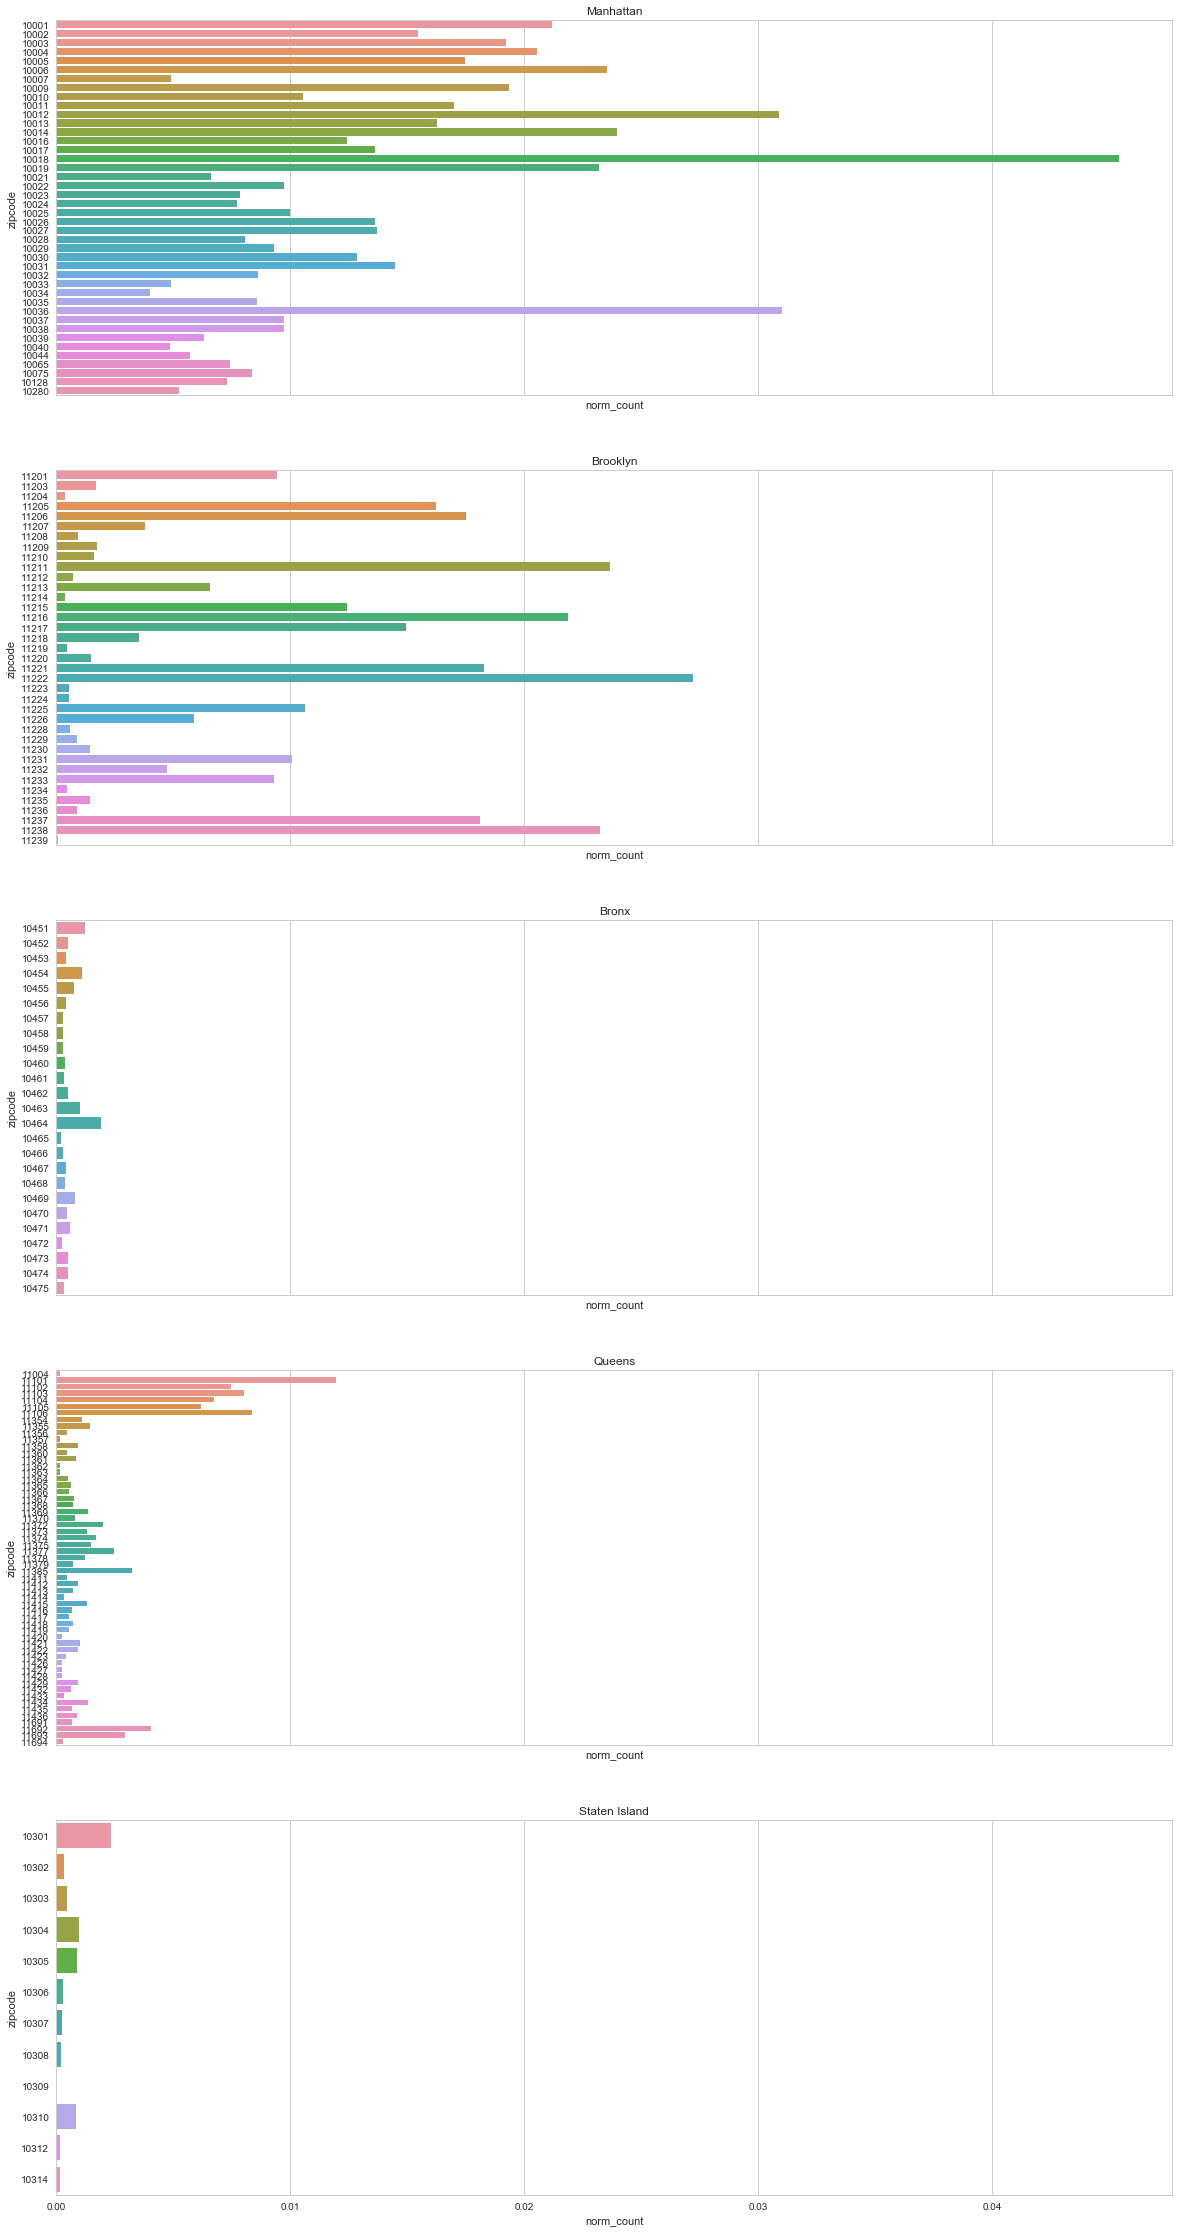

In [12]:
#NYC Airbnb's roomtypes from 2017 period
fig = plt.figure()
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(20,40),sharex=True)

sns.set(style="whitegrid", color_codes=True)

manhattan_zips = ['10026', '10027', '10030', '10037', '10039','10001', '10011', '10018', '10019', '10020', '10036', '10029', '10035', '10010', '10016', '10017', '10022', '10012', '10013', '10014', '10004', '10005', '10006', '10007', '10038', '10280', '10002', '10003', '10009', '10021', '10028', '10044', '10065', '10075', '10128', '10023', '10024', '10025', '10031', '10032', '10033', '10034', '10040']
manhattan_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(manhattan_zips)]
ax1.set_title("Manhattan")
sns.barplot(x="norm_count", y="zipcode", data=manhattan_count, ax=ax1, orient="h", ci=None)

brooklyn_zips = ['11212', '11213', '11216', '11233', '11238', '11209', '11214', '11228', '11204', '11218', '11219', '11230', '11234', '11236', '11239', '11223', '11224', '11229', '11235', '11201', '11205', '11215', '11217', '11231', '11203', '11210', '11225', '11226', '11207', '11208', '11211', '11222', '11220', '11232', '11206', '11221', '11237']
brooklyn_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(brooklyn_zips)]
ax2.set_title("Brooklyn")
sns.barplot(x="norm_count", y="zipcode", data=brooklyn_count, ax=ax2, orient="h", ci=None)

bronx_zips = ['10453', '10457', '10460', '10458', '10467', '10468', '10451', '10452', '10456', '10454', '10455', '10459', '10474', '10463', '10471', '10466', '10469', '10470', '10475', '10461', '10462','10464', '10465', '10472', '10473']
bronx_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(bronx_zips)]
sns.barplot(x="norm_count", y="zipcode", data=bronx_count, ax=ax3, orient="h", ci=None)
ax3.set_title("Bronx")

queens_zips = ['11361', '11362', '11363', '11364', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11365', '11366', '11367', '11412', '11423', '11432', '11433', '11434', '11435', '11436', '11101', '11102', '11103', '11104', '11105', '11106', '11374', '11375', '11379', '11385', '11691', '11692', '11693', '11694', '11695', '11697', '11004', '11005', '11411', '11413', '11422', '11426', '11427', '11428', '11429', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11368', '11369', '11370', '11372', '11373', '11377', '11378']
queens_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(queens_zips)]
sns.barplot(x="norm_count", y="zipcode", data=queens_count, ax=ax4, orient="h", ci=None)
ax4.set_title("Queens")

staten_zips = ['10302', '10303', '10310', '10306', '10307', '10308', '10309', '10312', '10301', '10304', '10305', '10314']
staten_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(staten_zips)]
sns.barplot(x="norm_count", y="zipcode", data=staten_count, ax=ax5, orient="h", ci=None)
ax5.set_title("Staten Island")

plt.show()

# Out of the zipcodes with high Airbnb-to-population ratios, which are priced the highest?

Out of 173 zipcodes, I sorted for areas where there was at least 1 Airbnb per 100 people and got a list of 35 zipcodes. Top 5 are: 10017, 10013, 10014, 10018, 10001
10017 = Murray Hill|East Side|Midtown --> Oddly this is east side.
10013 = Tribeca|Downtown|Manhattan
10014 = Meatpacking District|Downtown|Manhattan
10018 = Clinton|Midtown West|West Side|Manhattan
10001 = Chelsea

**Note to self --> Create choropleth

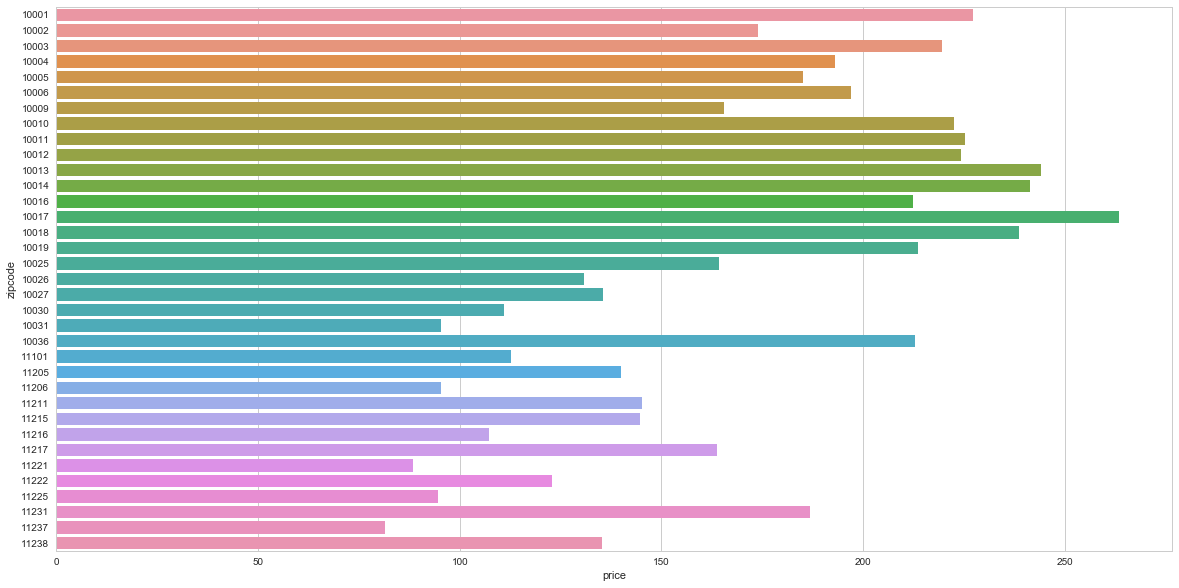

In [26]:
fig = plt.figure(figsize=(20,10))

sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x="price", y="zipcode", data=topzip17, orient="h", ci=None)

# topzip17

## Do Airbnb-to-population ratios correspond with average prices Airbnbs charge?

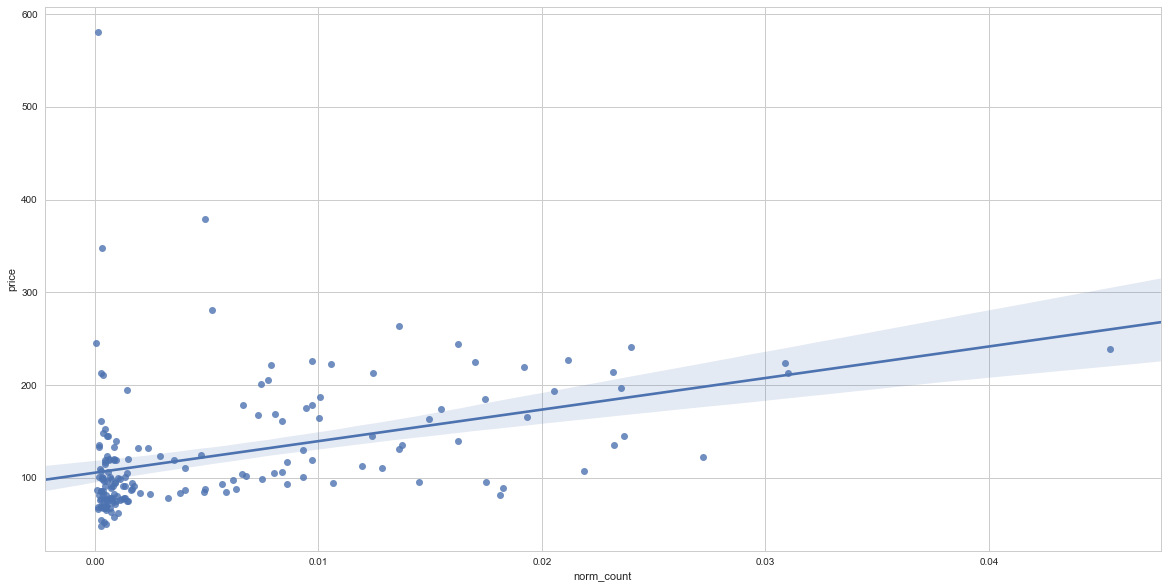

In [32]:
fig = plt.figure(figsize=(20,10))

sns.set(style="whitegrid", color_codes=True)

ax = sns.regplot(y="price", x="norm_count", data=norm17)

# topzip17

## Where are the Airbnb prices rising faster than rent prices?